In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = (224, 224)

train_ds = keras.utils.image_dataset_from_directory(
    'data/cats_dogs/',
    batch_size=16,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='training')

val_ds = keras.utils.image_dataset_from_directory(
    'data/cats_dogs/',
    batch_size=16,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='validation')

Found 25000 files belonging to 2 classes.
Using 17500 files for training.
Found 25000 files belonging to 2 classes.
Using 7500 files for validation.


In [11]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip(),
        keras.layers.RandomRotation(0.2),
        keras.layers.RandomContrast(0.5),
        keras.layers.RandomBrightness(0.5)
    ]
)

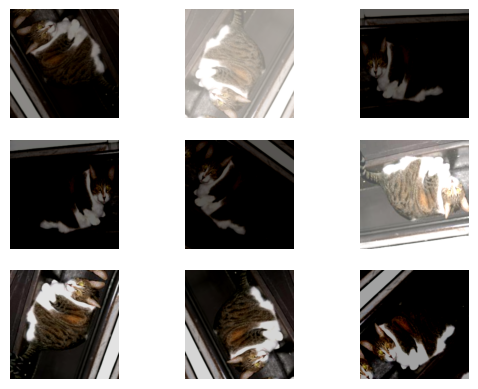

In [12]:
plt.figure(1)

for images, labels in train_ds.take(1):
    or_img = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        augm_img = data_augmentation(
            tf.expand_dims(or_img, 0),
            training=True)
        plt.imshow(augm_img[0].numpy().astype('uint8'))
        plt.axis('off')

In [13]:
base_model = keras.applications.MobileNetV3Small(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

base_model.trainable = False

# sequential
model = keras.Sequential()
model.add(keras.layers.Lambda(keras.applications.mobilenet_v3.preprocess_input, input_shape=(224, 224, 3)))
model.add(data_augmentation)
model.add(base_model)
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
  76/1094 [=>............................] - ETA: 2:00 - loss: 7.4118 - binary_accuracy: 0.5023

KeyboardInterrupt: 